In [ ]:
#install pyspark
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 37 kB/s 
     |████████████████████████████████| 198 kB 49.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=1524220151c28dbebbab87d5c81e374cc1bf304b33523559064513a96b8cc034
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
#create a pyspark session and check dataset datatypes
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-CHD').getOrCreate()
df = spark.read.csv('/content/drive/MyDrive/datasets/framingham01.csv', header = True, inferSchema = True)
df.printSchema()

root
 |-- male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- education: double (nullable = true)
 |-- currentSmoker: integer (nullable = true)
 |-- cigsPerDay: double (nullable = true)
 |-- BPMeds: double (nullable = true)
 |-- prevalentStroke: integer (nullable = true)
 |-- prevalentHyp: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- totChol: double (nullable = true)
 |-- sysBP: double (nullable = true)
 |-- diaBP: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- heartRate: double (nullable = true)
 |-- glucose: double (nullable = true)
 |-- TenYearCHD: integer (nullable = true)



In [ ]:
#print dataset
df.show()

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|  BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|   1| 39|      4.0|            0|       0.0|   0.0|              0|           0|       0|  195.0|106.0| 70.0|26.97|     80.0|   77.0|         0|
|   0| 46|      2.0|            0|       0.0|   0.0|              0|           0|       0|  250.0|121.0| 81.0|28.73|     95.0|   76.0|         0|
|   1| 48|      1.0|            1|      20.0|   0.0|              0|           0|       0|  245.0|127.5| 80.0|25.34|     75.0|   70.0|         0|
|   0| 61|      3.0|            1|      30.0|   0.0|              0|           1|       0|  225.0|150.0| 95.0|28.58|     65.

In [ ]:
#for simple data description
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#pyspark dataframe to pandas dataframe
pandasDF = df.toPandas()
pandasDF.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#the dimensions of our dataset
pandasDF.shape

(3751, 16)

In [ ]:
#the description of the dataset
pandasDF.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000,3751.000000
mean,0.445215,49.573447,1.956012,0.488403,9.008531,0.030392,0.005599,0.311917,0.027193,236.928019,132.368435,82.938550,25.808288,75.704079,81.880032,0.152493
std,0.497056,8.570204,1.021338,0.499932,11.925097,0.171686,0.074623,0.463338,0.162666,44.611594,22.046522,11.932779,4.065599,11.956382,23.882233,0.359546
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.085000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#check if there is null values
pandasDF.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
#target column values
pandasDF['TenYearCHD'].value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

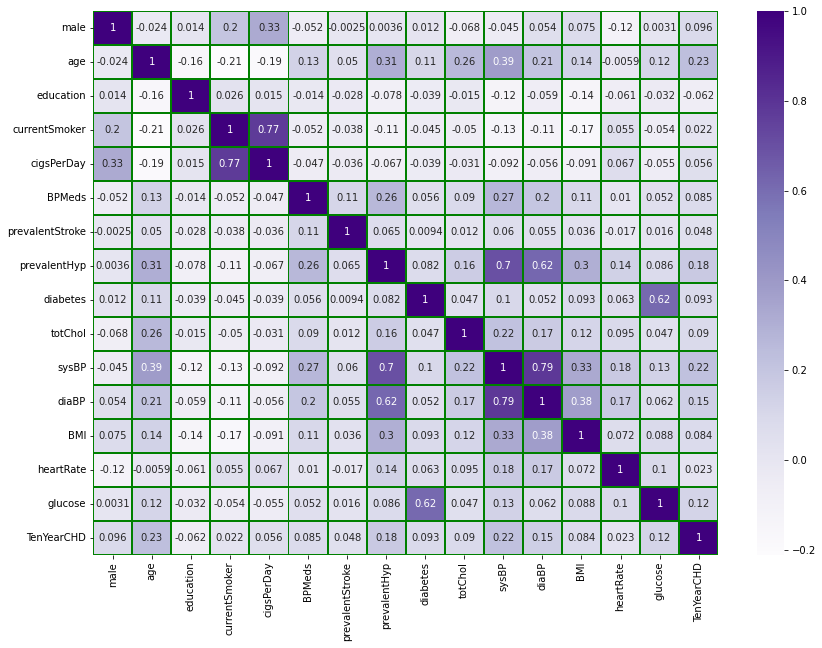

In [ ]:
#correlation Matrix (the correlation between variables)
plt.figure(figsize = (14, 10)) 
sns.heatmap(pandasDF.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

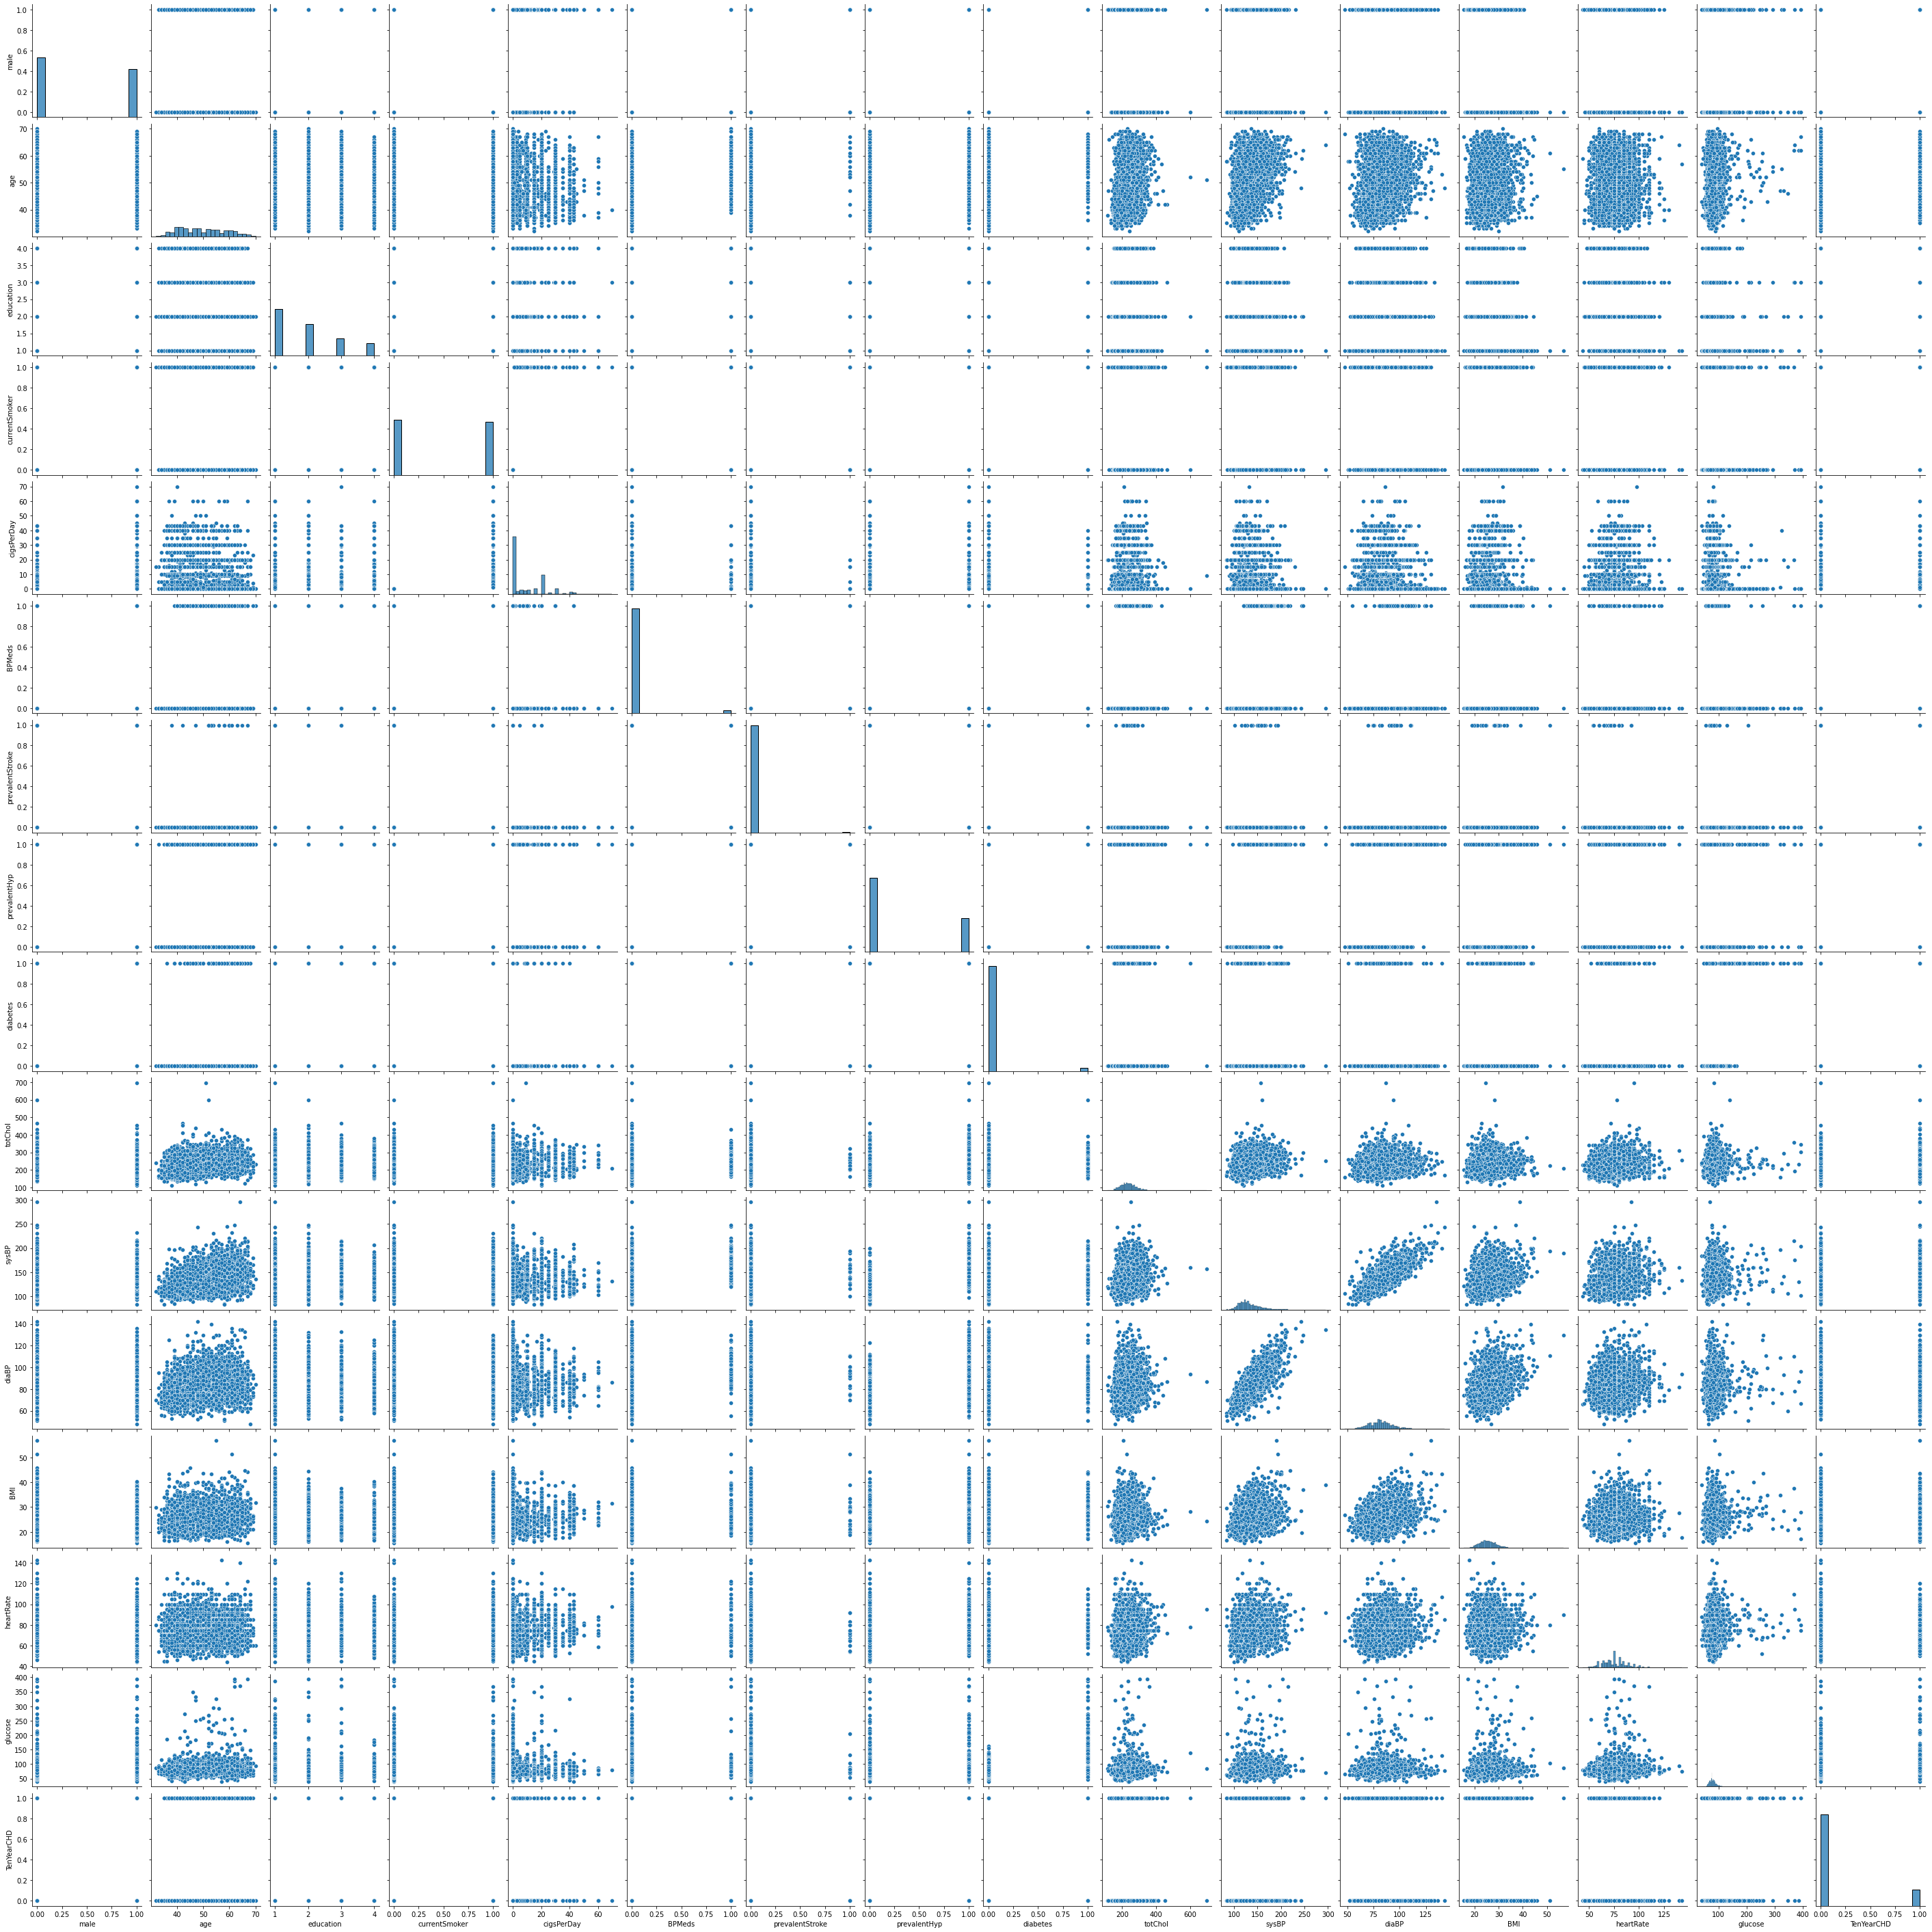

In [ ]:
#pairplot every two dimensions
sns.pairplot(pandasDF)
plt.show()

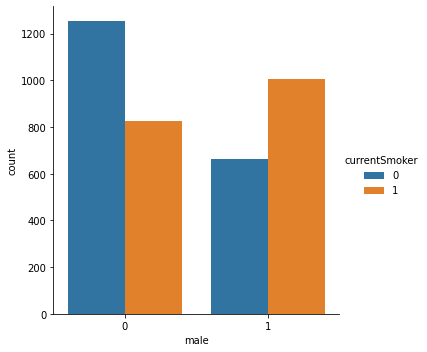

In [ ]:
# countplot of people based on their sex and whether they are current Smoker or not
sns.catplot(data=pandasDF, kind='count', x='male',hue='currentSmoker')
plt.show()

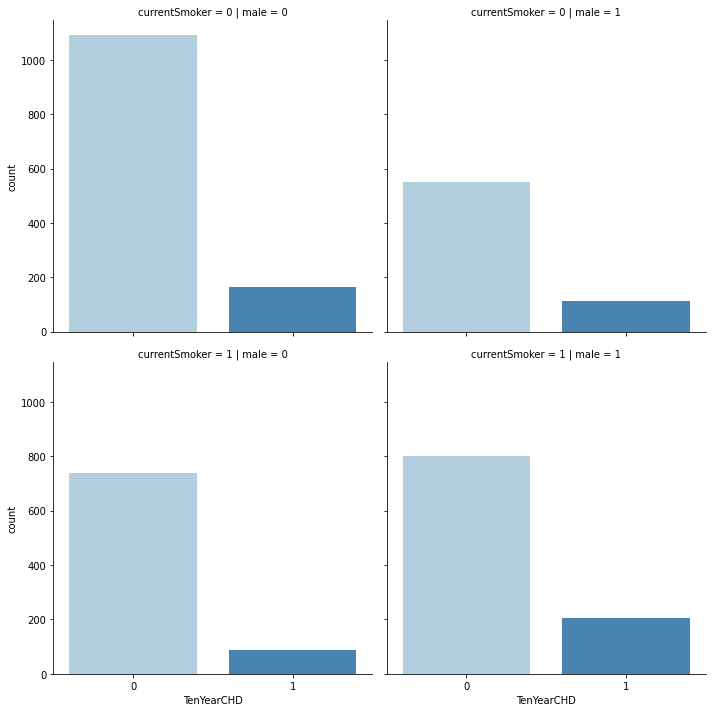

In [ ]:
# Countplot - subplots of No. of people affecting with CHD on basis of their sex and current smoking.
sns.catplot(data=pandasDF, kind='count', x='TenYearCHD', col='male',row='currentSmoker', palette='Blues')
plt.show()

**machine learning part:**

In [ ]:
from pyspark.ml.feature import VectorAssembler

In [ ]:
#the freatures
df.columns

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [ ]:
#gather the features (not the target) in one column 
vecAssembler = VectorAssembler(inputCols=['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose'],outputCol='features')


In [ ]:
#transform it into a dataframe (pyspark)
output = vecAssembler.transform(df)
output.columns

['male',
 'age',
 'education',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'features']

In [ ]:
#get the features and the target in one pyspark dataframe
df_final = output.select("features","TenYearCHD")

In [ ]:
df_final.show()

+--------------------+----------+
|            features|TenYearCHD|
+--------------------+----------+
|[1.0,39.0,4.0,0.0...|         0|
|(15,[1,2,9,10,11,...|         0|
|[1.0,48.0,1.0,1.0...|         0|
|[0.0,61.0,3.0,1.0...|         1|
|[0.0,46.0,3.0,1.0...|         0|
|[0.0,43.0,2.0,0.0...|         0|
|(15,[1,2,9,10,11,...|         1|
|[0.0,45.0,2.0,1.0...|         0|
|[1.0,52.0,1.0,0.0...|         0|
|[1.0,43.0,1.0,1.0...|         0|
|(15,[1,2,9,10,11,...|         0|
|(15,[1,2,9,10,11,...|         0|
|[1.0,46.0,1.0,1.0...|         0|
|[0.0,41.0,3.0,0.0...|         0|
|[0.0,38.0,2.0,1.0...|         1|
|[1.0,48.0,3.0,1.0...|         0|
|[0.0,46.0,2.0,1.0...|         1|
|[0.0,38.0,2.0,1.0...|         0|
|[1.0,41.0,2.0,0.0...|         0|
|[0.0,42.0,2.0,1.0...|         0|
+--------------------+----------+
only showing top 20 rows



In [ ]:
#split the dat 70% for training and 30% for testing
train, test = df_final.randomSplit([0.7,0.3])

**training:**

In [ ]:
#import logistic regression
from pyspark.ml.classification import LogisticRegression

In [ ]:
#set the target value
lr = LogisticRegression(labelCol="TenYearCHD")

In [ ]:
#train the model
lrm = lr.fit(train)

In [ ]:
#the coef of the model
lrm.coefficientMatrix 

DenseMatrix(1, 15, [0.537, 0.0717, -0.0634, 0.124, 0.0191, 0.0402, 0.8147, 0.2207, 0.0611, 0.003, 0.0123, 0.0027, 0.0093, -0.0033, 0.0062], 1)

In [ ]:
#the result of the training
lrm_summary = lrm.summary
lrm_summary.predictions.show()
#raw predection : IR value
#probability : the [0,1] value
#probability: 1/(1 + exp(-rawPrediction_k))

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+----------+--------------------+--------------------+----------+
|            features|TenYearCHD|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|(15,[1,2,9,10,11,...|       0.0|[4.45627249850842...|[0.98852760097471...|       0.0|
|(15,[1,2,9,10,11,...|       0.0|[4.07514166511568...|[0.98329402368074...|       0.0|
|(15,[1,2,9,10,11,...|       0.0|[4.13962604336137...|[0.98432094162197...|       0.0|
|(15,[1,2,9,10,11,...|       0.0|[4.27122665135388...|[0.98622768259951...|       0.0|
|(15,[1,2,9,10,11,...|       0.0|[4.08998977964408...|[0.98353618974146...|       0.0|
|(15,[1,2,9,10,11,...|       0.0|[4.08636498475163...|[0.98347739133960...|       0.0|
|(15,[1,2,9,10,11,...|       0.0|[4.35333818761329...|[0.98729957664180...|       0.0|
|(15,[1,2,9,10,11,...|       0.0|[3.99998857086839...|[0.98201358816740...|       0.0|
|(15,[1,2,9,10,11,...|       0.0|[3.9591492

In [ ]:
#the result of training
lrm_summary.predictions.describe().show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-------+-------------------+--------------------+
|summary|         TenYearCHD|          prediction|
+-------+-------------------+--------------------+
|  count|               2612|                2612|
|   mean|0.15122511485451762|0.020673813169984685|
| stddev| 0.3583367679029382| 0.14231711384062984|
|    min|                0.0|                 0.0|
|    max|                1.0|                 1.0|
+-------+-------------------+--------------------+



In [ ]:
# False positive rate by label
print("False positive rate by label:")
for i, rate in enumerate(lrm_summary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

False positive rate by label:
label 0: 0.9113924050632911
label 1: 0.008570139828597204


In [ ]:
# True positive rate by label:
print("True positive rate by label:")
for i, rate in enumerate(lrm_summary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

True positive rate by label:
label 0: 0.9914298601714028
label 1: 0.08860759493670886


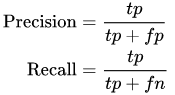

In [ ]:
#the recall for the two labels
#sensibilité
# TP/(TP+TN)
print("Recall by label:")
for i, rec in enumerate(lrm_summary.recallByLabel):
    print("label %d: %s" % (i, rec))

Recall by label:
label 0: 0.9914298601714028
label 1: 0.08860759493670886


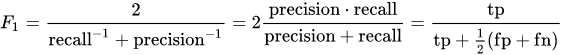

In [ ]:
#the F-measure for the two labels
#the harmonic mean of precision and recall
print("F-measure by label:")
for i, f in enumerate(lrm_summary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

F-measure by label:
label 0: 0.9206282722513088
label 1: 0.15590200445434296


**testing:**

In [ ]:
 #import BinaryClassificationEvaluator to evaluate the testing part
 from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [ ]:
#get the testing predictions
pred_labels = lrm.evaluate(test)

In [ ]:
#the summary of the test
pred_labels.predictions.show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+--------------------+----------+--------------------+--------------------+----------+
|            features|TenYearCHD|       rawPrediction|         probability|prediction|
+--------------------+----------+--------------------+--------------------+----------+
|(15,[1,2,9,10,11,...|         0|[4.22236094468795...|[0.98554794197798...|       0.0|
|(15,[1,2,9,10,11,...|         0|[4.20456974647766...|[0.98529233715914...|       0.0|
|(15,[1,2,9,10,11,...|         0|[4.16871620356347...|[0.98476362840418...|       0.0|
|(15,[1,2,9,10,11,...|         0|[4.35238650801772...|[0.98728763787893...|       0.0|
|(15,[1,2,9,10,11,...|         0|[4.08452144802256...|[0.98344740786690...|       0.0|
|(15,[1,2,9,10,11,...|         0|[3.99184349860944...|[0.98186915631782...|       0.0|
|(15,[1,2,9,10,11,...|         0|[3.97675908336375...|[0.98159866077916...|       0.0|
|(15,[1,2,9,10,11,...|         0|[4.06950151105414...|[0.98320112051508...|       0.0|
|(15,[1,2,9,10,11,...|         0|[4.0456679

In [ ]:
#evaluate the prediction column with the predection column
eval = BinaryClassificationEvaluator(rawPredictionCol="prediction", labelCol="TenYearCHD")

In [ ]:
#get the accuracy of our test
auc = eval.evaluate(pred_labels.predictions)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


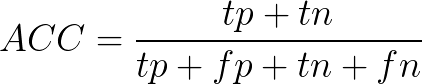

In [ ]:
#the accuracy value #AUC: Area Under the ROC Curve
auc

0.5258759411301784

In [ ]:
#the accuracy of the model
accuracy = lrm_summary.accuracy
#the falsepositive
falsePositiveRate = lrm_summary.weightedFalsePositiveRate
#the truepositive
truePositiveRate = lrm_summary.weightedTruePositiveRate
#the fmeasure
fMeasure = lrm_summary.weightedFMeasure()
#the precesion
precision = lrm_summary.weightedPrecision
#the recall
recall = lrm_summary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

Accuracy: 0.8549004594180705
FPR: 0.7748630043099587
TPR: 0.8549004594180705
F-measure: 0.804982454571446
Precision: 0.8273388729665289
Recall: 0.8549004594180705


/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


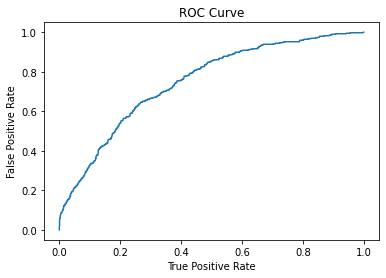

Training set areaUnderROC: 0.7481937616690344


In [ ]:
#the performance of a classification model
roc = lrm_summary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(lrm_summary.areaUnderROC))

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


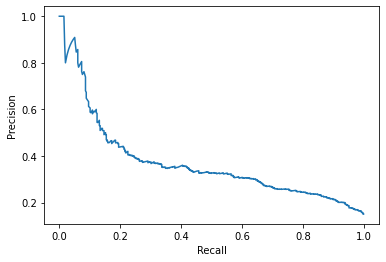

In [ ]:
# Precision-Recall (PR) Curve
pr = lrm_summary.pr.toPandas()
plt.plot(pr['recall'],pr['precision'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


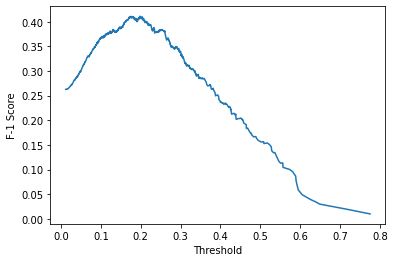

In [ ]:
# Plot the threshold-F-Measure curve
#The Threshold or Cut-off represents in a binary classification the probability that the prediction is true.
fm = lrm_summary.fMeasureByThreshold.toPandas()
plt.plot(fm['threshold'], fm['F-Measure'])
plt.xlabel('Threshold')
plt.ylabel('F-1 Score')
plt.show()

In [ ]:
#save model
path = "/content/drive/MyDrive/datasets/score-model"
lrm.save(path)

**decesion tee:**

In [ ]:
#we gonna use the same dataset
df_final1 = df_final

In [ ]:
#split the dataset
train1, test1 = df_final1.randomSplit([0.7,0.3])

In [ ]:
#the number of training row
train1.count()

2569

In [ ]:
#the predifined class
from pyspark.ml.classification import DecisionTreeClassifier

In [ ]:
#train the model for target value 
dt = DecisionTreeClassifier(labelCol="TenYearCHD").fit(train1)

In [ ]:
type(df)

pyspark.sql.dataframe.DataFrame

In [ ]:
#test the other part
df_pred = dt.transform(test1)

In [ ]:
#the summury fir the predection
df_pred.show()

+--------------------+----------+-------------+--------------------+----------+
|            features|TenYearCHD|rawPrediction|         probability|prediction|
+--------------------+----------+-------------+--------------------+----------+
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0,37.0]|[0.95357590966122...|       0.0|
|(15,[1,2,9,10,11,...|         0| [760.0

In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="TenYearCHD", predictionCol="prediction", metricName="accuracy")
accuracy1 = evaluator.evaluate(df_pred)
#the error rate value
print("Test Error = %g " % (1.0 - accuracy1))

Test Error = 0.153976 


In [ ]:
# accuracy of the logestic regression
accuracy

0.8549004594180705

In [ ]:
# accuracy of the Decision tree
accuracy1

0.8460236886632826